# RandomForestClassifier LabelEncode Target Class
1 column for y
500 estimators first run



In [2]:
#Import Dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [3]:
#SOURCE: https://www.tutorialspoint.com/python_data_access/python_postgresql_database_connection.htm
import psycopg2

#establishing the connection
conn = psycopg2.connect(
   database="Body_Performance", user='username', password='passwordhere', host='localhost', port= '5432'
)
#Creating a cursor object using the cursor() method
cursor = conn.cursor()

#Executing an MYSQL function using the execute() method
cursor.execute("select version()")

# Fetch a single row using fetchone() method.
data = cursor.fetchone()
print("Connection established to: ",data)



Connection established to:  ('PostgreSQL 12.13, compiled by Visual C++ build 1914, 64-bit',)


In [4]:
body_df = pd.read_sql('select * from body_performance', con=conn)
body_df.head()

,age,gender,height_cm,weight_kg,body_fat_pct,diastolic,systolic,gripforce,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm,ranking
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [5]:
#Closing the connection
conn.close()


In [6]:
# OneHotEncoder or Get_dummies on Gender
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

encoded = pd.DataFrame(enc.fit_transform(body_df.gender.values.reshape(-1,1)))

encoded.columns = enc.get_feature_names_out(['gender'])
encoded.head()


,gender_F,gender_M
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [7]:
#If keeping class/level in one column as Y, Encode with dictionary values

ranking_num = {"A":0, "B":1, "C":2, "D":3}

body_df["ranking_num"] = body_df["ranking"].apply(lambda x: ranking_num[x])

body_df.head()


,age,gender,height_cm,weight_kg,body_fat_pct,diastolic,systolic,gripforce,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm,ranking,ranking_num
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1


In [8]:
age_count = body_df.value_counts("age")
age_count

age
21    964
22    789
23    668
25    644
26    629
24    617
27    546
28    527
29    407
30    374
60    368
31    338
37    282
32    275
62    265
61    254
39    243
36    239
38    230
63    230
34    229
33    229
35    223
41    217
64    215
40    211
56    197
48    196
43    192
59    192
51    191
50    189
55    185
45    183
57    181
46    181
58    180
42    179
47    172
44    172
49    163
54    152
52    140
53    135
dtype: int64

In [9]:
#Drop columns and merge encoded df
#Ignoring encode2 for now
body_df = body_df.drop(["gender", "ranking"], axis=1)

body_df2 = body_df.merge(encoded, left_index=True, right_index=True)
body_df2.head()


,age,height_cm,weight_kg,body_fat_pct,diastolic,systolic,gripforce,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm,ranking_num,gender_F,gender_M
0,27,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2,0.0,1.0
1,25,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0,0.0,1.0
2,31,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2,0.0,1.0
3,32,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1,0.0,1.0
4,28,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1,0.0,1.0


In [10]:
#Set X, y 
y = body_df2["ranking_num"]
X = body_df2.drop("ranking_num", axis=1)

print(y.shape)
X.head()

(13393,)


,age,height_cm,weight_kg,body_fat_pct,diastolic,systolic,gripforce,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm,gender_F,gender_M
0,27,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,0.0,1.0
1,25,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0.0,1.0
2,31,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,0.0,1.0
3,32,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,0.0,1.0
4,28,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,0.0,1.0


In [11]:
y[:10]

0    2
1    0
2    2
3    1
4    1
5    1
6    3
7    1
8    2
9    1
Name: ranking_num, dtype: int64

In [12]:
#Split train/test data and scale using Standard Scaler at this time (mean of 0).  #Should we use MinMax(0-1)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=.75)

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(10044, 12)
(3349, 12)


In [13]:
#Trying RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {rf_model.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf_model.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.7482830695730068


In [14]:
feature_importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.25312794575519676, 'sit_and_bend_forward_cm'),
 (0.1329903065751447, 'sit_ups_counts'),
 (0.09895382963283088, 'body_fat_pct'),
 (0.08776394205295954, 'age'),
 (0.08590751884262363, 'weight_kg'),
 (0.08140201944966781, 'gripforce'),
 (0.07555196939002967, 'broad_jump_cm'),
 (0.0641531117968071, 'height_cm'),
 (0.0528470060611526, 'systolic'),
 (0.050258703471498266, 'diastolic'),
 (0.008564329679262997, 'gender_F'),
 (0.008479317292825837, 'gender_M')]

In [23]:
#Feature importance dataframe?? Or just go straight to visual? 

feature_importances = rf_model.feature_importances_

sort_imp = np.argsort(feature_importances)[::1]
labels = df.column[1:]

for f in range(X_train.shape[1]):
    print("%2d") %-*s %f % (f = 1, 30,
                           labels[sort_imp[f]],
                           feature_importances[sort_imp[f]])
#sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

feature_df = pd.DataFrame(data=feature_importances, columns=["Weight", "Feature"])
feature_df.head(

SyntaxError: invalid syntax (3969994630.py, line 7)

In [24]:
#Accuracy score and confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

predictions = rf_model.predict(X_test_scaled)
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.7482830695730068


In [25]:
# printing confusion matrix but error:      Shape of passed values is (4, 4), indices imply (2, 2) Needs to be resolved
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3"],
    columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3"])
display(cm_df)

,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,708,103,6,1
Actual 1,182,545,91,27
Actual 2,70,156,554,55
Actual 3,10,47,95,699


In [26]:
#Classification report for random forest

print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       818
           1       0.64      0.64      0.64       845
           2       0.74      0.66      0.70       835
           3       0.89      0.82      0.86       851

    accuracy                           0.75      3349
   macro avg       0.75      0.75      0.75      3349
weighted avg       0.75      0.75      0.75      3349



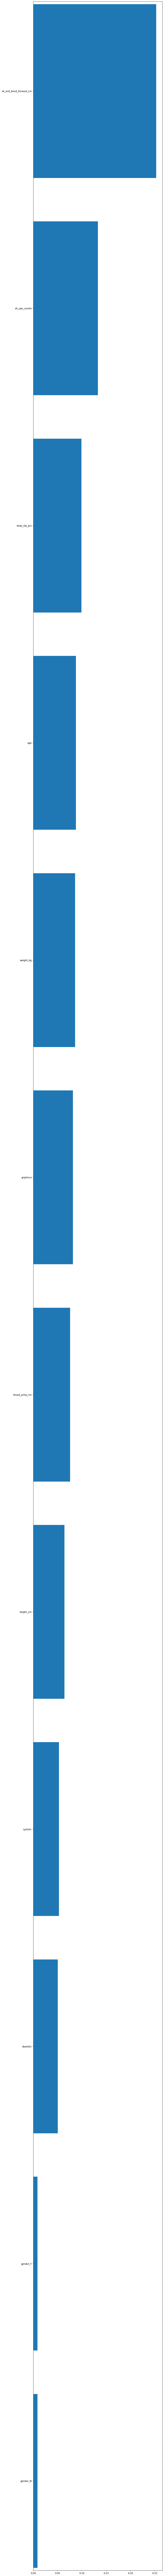

In [18]:
# Need to test feature importances. THis is one way but plot is not showing up how I'd like. Need to adjust.

features = sorted(zip(X.columns, rf_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [19]:
# Import an Extremely Random Trees classifier
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(random_state=1, n_estimators=1000).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.7294714840250821


In [20]:
predictions2 = clf.predict(X_test_scaled)
acc_score2 = accuracy_score(y_test, predictions2)
print(f"Accuracy Score : {acc_score2}")

print("Classification Report")
print(classification_report(y_test, predictions2))

Accuracy Score : 0.7294714840250821
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       818
           1       0.62      0.59      0.60       845
           2       0.71      0.65      0.68       835
           3       0.89      0.82      0.85       851

    accuracy                           0.73      3349
   macro avg       0.73      0.73      0.73      3349
weighted avg       0.73      0.73      0.73      3349

